Objective function output:  32.6024179859
Objective function output:  5308.848564674312
Objective function output:  26736.764990548952
Objective function output:  6.82
Objective function output:  122317448.61430934
([2.841, 0.544, 6.331, 9.357], 46.300881651066724)
([2.5083282384730143, 2.3699355427698108, 1.852087430746018, 6.552091949599327], 11.647710756215467)


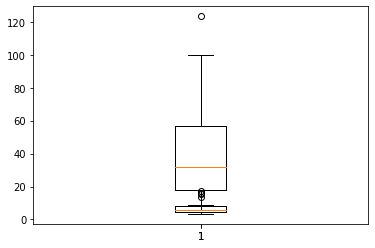

None


In [2]:
import time
import matplotlib.pyplot as plt
import numpy as np
from numpy import random

max = 999999999

fcounter = 0
g1counter = 0
g2counter = 0
g3counter = 0
g4counter = 0

def f(myinput=[]):
    global fcounter
    fcounter +=1
    return ((1.10471 * (myinput[0] * myinput[0]) * myinput[1]) + 
    (0.04811 * myinput[2] * myinput[3] * (14 + myinput[1]))) 


def t(myinput=[]):
    
    return np.sqrt(np.square(t1c(myinput)) + 
    np.square(t2c(myinput)) + 
    (myinput[1]*t1c(myinput)*t2c(myinput)) / 
    (np.sqrt(0.25*(np.square(myinput[1]) + 
    np.square((myinput[0]+myinput[2]))))))


def t1c(myinput=[]):
    return (6000 / (np.sqrt(2)*myinput[0]*myinput[1]))


def t2c(myinput=[]):
    top = 6000*(14+0.5*myinput[1]) * (np.sqrt(0.25 *(np.square(myinput[1]) + 
    np.square((myinput[0]+myinput[2])))))

    bot = 2*(0.707*myinput[0]*myinput[1])*((np.square(myinput[1] )/12) + 
    0.25*(np.square(myinput[0]+myinput[2])))
    all = top/(bot)
    return all


def g1(myinput=[]):
    global g1counter
    g1counter += 1
    return 13600 - t(myinput)


def sigma(myinput=[]):
    return ((504000)/(np.square(myinput[2])*myinput[3]))


def g2(myinput=[]):
    global g2counter
    g2counter += 1
    return 30000 - sigma(myinput)


def g3(myinput=[]):
    global g3counter
    g3counter += 1
    return myinput[3] - myinput[0]


def g4(myinput=[]):
    global g4counter
    g4counter += 1
    return ((64746.022*(1-0.0282346*myinput[2])*(myinput[2]*np.square(myinput[3])*myinput[3])) - 6000)


def randomSearch(i):
    while i > 0:
        global max
        x = [0, 0, 0, 0]
        x[0] = round(random.uniform(0.125, 5), 3)
        x[1] = round(random.uniform(0.125, 5), 3)
        x[2] = round(random.uniform(0.1, 10), 3)
        x[3] = round(random.uniform(0.1, 10), 3)
        if (g1(x) > 0, 
        g2(x) > 0, 
        g3(x) > 0,
        g4(x) > 0):
            if max > f(x):
                max = f(x)
            i -= 1
    return x, f(x)

def decay(k):
    ti = 10
    tk = ti/k
    return tk

def gaussian(myinput = []):
    count = 0
    sigma1 = (5 - 0.125) * (0.1)
    sigma2 = (10 - 0.1) * (0.1)
    while(count == 0 or g1(arr) < 0 or g2(arr) < 0 or g3(arr) < 0 or g4(arr) < 0):
        arr = [11,11,11,11]
        count += 1
        while(arr[0] > 5 or arr[0] < 0.125):
            arr[0] = np.random.normal(myinput[0], sigma1)

        while(arr[1] > 5 or arr[1] < 0.125):
            arr[1] = np.random.normal(myinput[1], sigma1)

        while(arr[2] > 10 or arr[2] < 0.1):
            arr[2] = np.random.normal(myinput[2], sigma2)

        while(arr[3] > 10 or arr[3] < 0.1):
            arr[3] = np.random.normal(myinput[3], sigma2)
    return arr


def SA(n):
    k = 0
    x = [0,0,0,0]
    x[0] = np.random.uniform(0.125, 5)
    x[1] = np.random.uniform(0.125, 5)
    x[2] = np.random.uniform(0.1, 10)
    x[3] = np.random.uniform(0.1, 10)
    
    fx_best = f(x)
    center_list = x
    center_fx = fx_best
    while k < n:
        k += 1
        xCompliment = gaussian(center_list)
        yCompliment = f(xCompliment)
        sigmaY = yCompliment - center_fx
        if sigmaY <= 0 or np.random.uniform(0,1) < min(np.exp((-1* sigmaY)/decay(k)), 1):
            center_list = xCompliment
            center_fx = yCompliment
        if yCompliment < center_fx:
            x = xCompliment
            center_fx = yCompliment
    return x, center_fx

def boxplot(n):
    testRandom = []
    testSA = []
    while n>0:
        testRandom.append(randomSearch(100)[1])
        testSA.append(SA(100)[1])
        n -=1

    plt.boxplot(testSA)
    plt.boxplot(testRandom)
    plt.show()

    


x = [1.05, 3.15, 4.43, 7.87]

print("Objective function output: ", f(x))
print("Objective function output: ", g1(x))
print("Objective function output: ", g2(x))
print("Objective function output: ", g3(x))
print("Objective function output: ", g4(x))

print(randomSearch(100))
print(SA(100))
print(boxplot(21))

# as we can see with SA there is generaly a much cheaper cost to the beam
# over 21 trials we have a lower variance with SA and a chearper cost
# where as random search varies from almost 100 to somehwere in the 20's
# which makes it harder to find a good optimal value
# and SA's data is more concentrated towards one point with  a few outlier cases
# so overall SA is more efficent than random search